In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [59]:
df = pd.read_csv('Mall_Customers.csv')

In [60]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [63]:
df = df.drop('CustomerID', axis=1)

In [64]:
df.shape

(200, 4)

In [65]:
df = df.rename({'Genre' : 'gender', 
           'Age' : 'age', 'Annual Income (k$)' : 'annual_income (k$)',
          'Spending Score (1-100)': 'spending_score (1-100)'}, axis=1)

In [66]:
df.head()

,gender,age,annual_income (k$),spending_score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


(array([ 88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

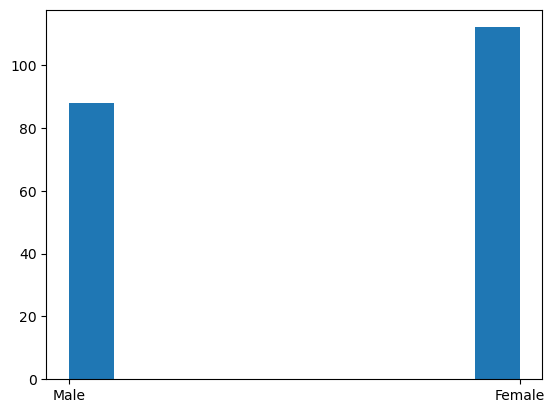

In [67]:
plt.hist(df['gender'])

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

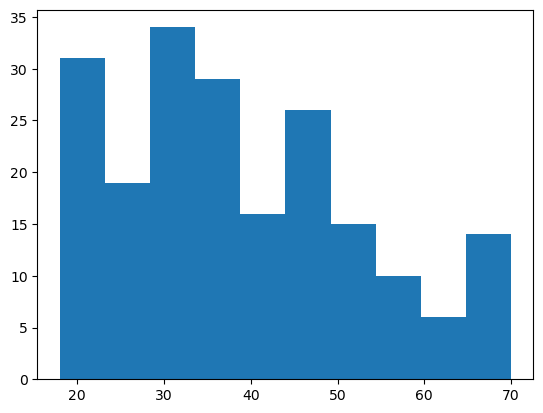

In [68]:
plt.hist(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb20194c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb2019a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0bb20191f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb1fa5040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb1fa5310>],
 'means': []}

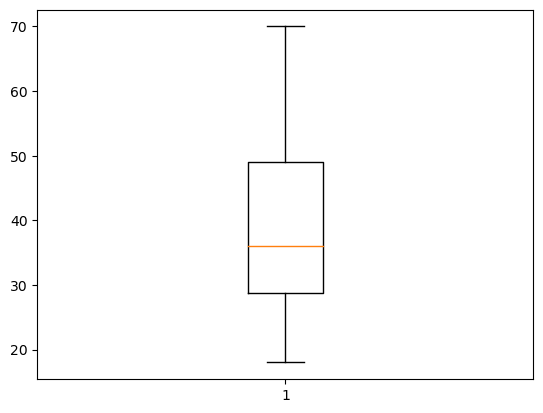

In [69]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb1f79850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb1f79df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0bb1f79580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb1f863d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb1f866a0>],
 'means': []}

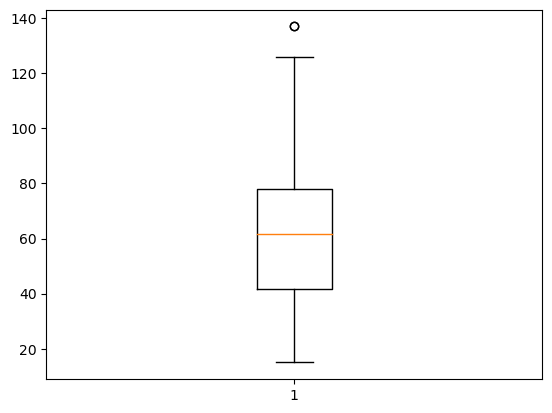

In [70]:
plt.boxplot(df['annual_income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb1f59b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb1eea160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0bb1f598b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb1eea700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb1eea9d0>],
 'means': []}

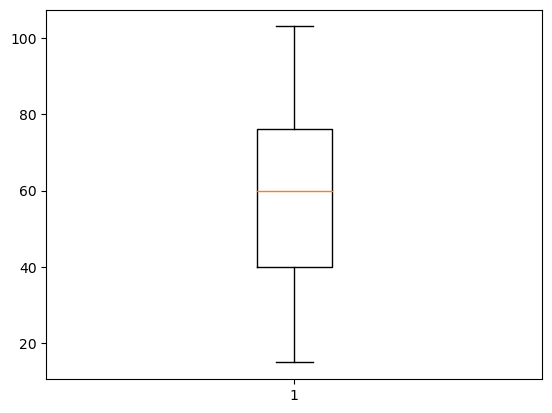

In [71]:
df = df[df['annual_income (k$)'] <= df['annual_income (k$)'].quantile(0.95)]
plt.boxplot(df['annual_income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb1ec05b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb1ec0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0bb1ec02e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb1ece130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb1ece400>],
 'means': []}

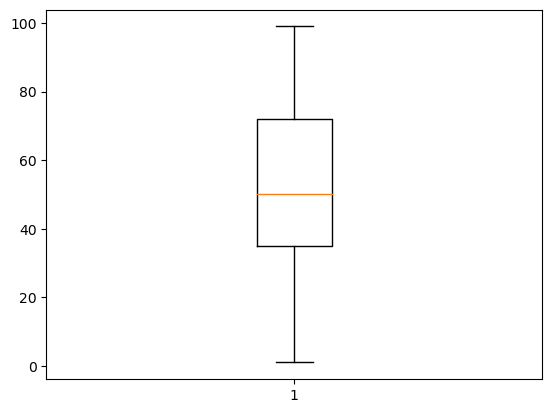

In [72]:
plt.boxplot(df['spending_score (1-100)'])

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(df[['age', 'annual_income (k$)', 'spending_score (1-100)']])

In [74]:
#using the elbow method to determine the number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

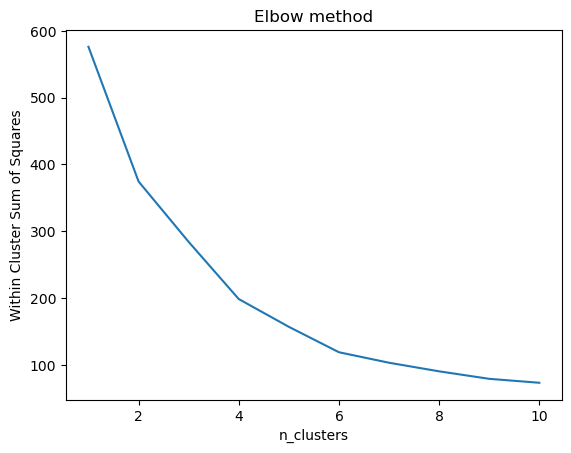

In [75]:
#visualizing
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel('n_clusters')
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In [76]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(features)

KMeans(n_clusters=5)

In [77]:
df['cluster'] = kmeans.labels_

In [78]:
df.head()

,gender,age,annual_income (k$),spending_score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


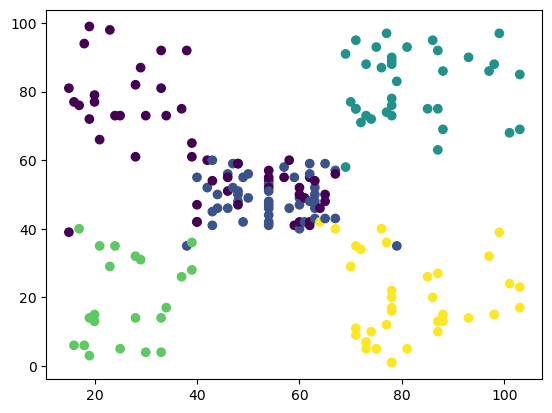

In [79]:
plt.scatter(df['annual_income (k$)'], df['spending_score (1-100)'], c=kmeans.labels_)